# Explore here

In [2]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# clustering
from sklearn.cluster import KMeans

# metricas
from sklearn.metrics import silhouette_score

# reduccion de dimensionalidad
from sklearn.decomposition import PCA

import warnings

1. Analisis de los datos y Split

Sistema de agrupación de casas

Queremos ser capaces de clasificar casas según su la región en la que se encuentren y del ingreso medio. Para ello, utilizaremos el famoso conjunto de datos California Housing. Se construyó utilizando los datos del censo de California de 1990. Contiene una fila por grupo de bloques censales. Un grupo de bloques es la unidad geográfica más pequeña para la que se publican datos del censo de USA.

O descargarlo y añadirlo a mano en tu repositorio. En este caso solo nos interesan las columnas Latitude, Longitude y MedInc.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
columnas_deseadas = ['Latitude', 'Longitude', 'MedInc']
df = df[columnas_deseadas]
df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [7]:
warnings.filterwarnings("ignore")

In [8]:
# Hacemos el Split

from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X = df[['Latitude', 'Longitude']]  # Features
y = df['MedInc']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento X:", X_train.shape)
print("Dimensiones del conjunto de prueba X:", X_test.shape)
print("Dimensiones del conjunto de entrenamiento y:", y_train.shape)
print("Dimensiones del conjunto de prueba y:", y_test.shape)


Dimensiones del conjunto de entrenamiento X: (16512, 2)
Dimensiones del conjunto de prueba X: (4128, 2)
Dimensiones del conjunto de entrenamiento y: (16512,)
Dimensiones del conjunto de prueba y: (4128,)


2. Construye un K-Means

Clasifica los datos en 6 clusters utilizando, para ello, el modelo K-Means. A continuación, almacena el cluster al que pertenece cada casa como una columna nueva del dataset. Podrías llamarla cluster. Para introducirla a tu conjunto de datos quizá tengas que categorizarla. Observa qué formato y valores tiene y actúa en consecuencia. Grafícala en un diagrama de puntos y describe lo que ves.

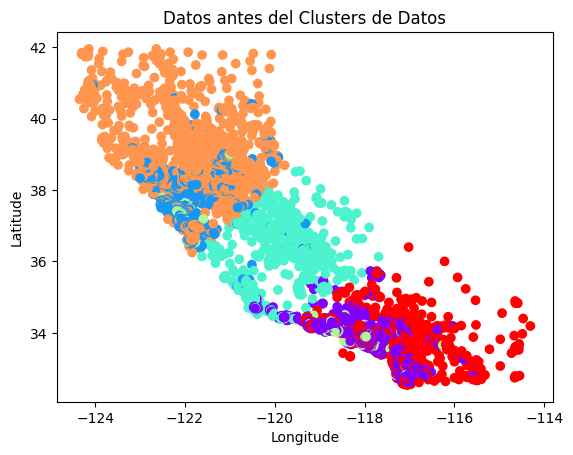

In [23]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Escalar los datos para generar clusters significativos y útiles a partir de los datos de entrada
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Graficar los clusters en un diagrama de puntos
plt.scatter(df['Longitude'], df['Latitude'], c=df['cluster'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Datos antes del Clusters de Datos')
plt.show()


In [12]:
y.unique()

array([8.3252, 8.3014, 7.2574, ..., 2.3598, 2.3661, 2.0943])

In [13]:
# Entrenar el modelo
model = KMeans(n_clusters = 3, random_state = 42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [14]:
# Obtener los centros de los clusters y las etiquetas
centroids = model.cluster_centers_
labels = model.labels_

In [15]:
centroids

array([[  33.82435098, -117.88493836],
       [  38.11365147, -121.93029495],
       [  35.99619848, -119.71000542]])

In [16]:
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [26]:
# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

3. Predice con el conjunto de test

Ahora utiliza el modelo entrenado con el conjunto test y añade los puntos al gráfico anterior para confirmar que la predicción es satisfactoria o no.